### Importing basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Getting the data

In [2]:
raw_data=pd.read_csv("laptop_data.csv")

### Exploring the data

In this step, I'm just exploring the data to get sense of data.

In [3]:
raw_data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
raw_data.shape

(1303, 12)

In [5]:
raw_data.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


### Basic Data Cleaning

It seems the first column "Unnamed:0" is just an index, so removing this column. 

In [7]:
raw_data.drop(columns=["Unnamed: 0"],inplace=True)

In [8]:
raw_data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [9]:
raw_data.duplicated().sum()

29

In [10]:
raw_data.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

### Inference

 There are some duplicated rows.
 There are no null values.
 There are only two numeric columns and all other columns are object type.

First we will remove duplicate rows. Then we will convert all the object type columns into a workable data.

In [11]:
raw_data.drop_duplicates(inplace=True)

In [12]:
raw_data.shape

(1274, 11)

### Feature Engineering

There are many text columns. so information should be extracted and it should be in a format so that algorithm can easily find the pattern

The RAM and weight column is similar, number followed by text (GB,Kg). The numeric part is enough. the text part doesnot provide any distinct information. So, I'm converting those two columns into a numeric datatype.

In [13]:
raw_data["Ram"]=raw_data["Ram"].str[:-2]

In [14]:
raw_data["Weight"]=raw_data["Weight"].str[:-2]

In [15]:
raw_data.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

In [16]:
raw_data["Ram"]=raw_data["Ram"].astype("float32")
raw_data["Weight"]=raw_data["Weight"].astype("float32")

In [17]:
raw_data.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                 float32
Memory               object
Gpu                  object
OpSys                object
Weight              float32
Price               float64
dtype: object

In [18]:
raw_data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [19]:
raw_data["ScreenResolution"].value_counts()

Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel 2560x1440                           

Now Im concentrating on Screen Resolution Column.Here it has info such as

<br> Resolution
<br> Tochscreen or not
<br> Types of Display (IPS or not)
<br> Types of HD (Full/Ultra/Quad)

In [20]:
raw_data["Resolution"]=raw_data["ScreenResolution"].str[-9:].str.strip()

In [21]:
raw_data["Resolution"].value_counts

<bound method IndexOpsMixin.value_counts of 0       2560x1600
1        1440x900
2       1920x1080
3       2880x1800
4       2560x1600
          ...    
1269     1366x768
1270    1920x1080
1271    3200x1800
1272     1366x768
1273     1366x768
Name: Resolution, Length: 1274, dtype: object>

In [22]:
raw_data["X_res"]=raw_data["Resolution"].str.split("x").str[0]
raw_data["Y_res"]=raw_data["Resolution"].str.split("x").str[1]

In [23]:
raw_data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Resolution,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560x1600,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440x900,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920x1080,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880x1800,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560x1600,2560,1600


In [24]:
raw_data.drop(columns=["Resolution"],inplace=True)

In [25]:
raw_data["Touch"]=raw_data["ScreenResolution"].apply(lambda screen:1 if "Touchscreen" in screen else 0)

In [26]:
raw_data["IPS"]=raw_data["ScreenResolution"].apply(lambda screen:1 if "IPS" in screen else 0)

In [27]:
raw_data["Full_HD"]=raw_data["ScreenResolution"].apply(lambda screen:1 if "Full" in screen else 0)
raw_data["HD+"]=raw_data["ScreenResolution"].apply(lambda screen:1 if "HD+" in screen else 0)
raw_data["Ultra"]=raw_data["ScreenResolution"].apply(lambda screen:1 if "Ultra" in screen else 0)

If i create a seperate column for non-hd/normal screen then it creates a multcollinearity problem, since the screen which are neither of above three will be normal screen.

In [28]:
raw_data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Touch,IPS,Full_HD,HD+,Ultra
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560,1600,0,1,0,0,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440,900,0,0,0,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920,1080,0,0,1,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880,1800,0,1,0,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560,1600,0,1,0,0,0


Here X_res, Y_res, Inches these columns can be converted into single column called PPI.

In [29]:
raw_data["PPI"]=np.sqrt((raw_data["X_res"].astype("float32")**2 + raw_data["Y_res"].astype("float32")**2))/raw_data["Inches"]

In [30]:
raw_data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Touch,IPS,Full_HD,HD+,Ultra,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560,1600,0,1,0,0,0,226.983009
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440,900,0,0,0,0,0,127.677938
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920,1080,0,0,1,0,0,141.212002
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880,1800,0,1,0,0,0,220.534620
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560,1600,0,1,0,0,0,226.983009


Now I'm going to do feature engineering on Cpu column and GPU column

In [31]:
raw_data["Cpu"].value_counts()

Intel Core i5 7200U 2.5GHz              190
Intel Core i7 7700HQ 2.8GHz             146
Intel Core i7 7500U 2.7GHz              132
Intel Core i7 8550U 1.8GHz               73
Intel Core i5 8250U 1.6GHz               72
                                       ... 
Intel Core M m3-7Y30 2.2GHz               1
AMD A9-Series 9410 2.9GHz                 1
Intel Pentium Dual Core N4200 1.1GHz      1
Intel Pentium Dual Core 4405Y 1.5GHz      1
AMD E-Series E2-6110 1.5GHz               1
Name: Cpu, Length: 118, dtype: int64

There are lots of different variations, if I try to capture all these I will get more features which are not important, so I'm going to capture major feature such as
<br> Intel/AMD
<br> iX/Ax

In [32]:
raw_data[raw_data["Cpu"].apply(lambda text:True if "AMD" in text else False)]["Cpu"]

5               AMD A9-Series 9420 3GHz
22         AMD E-Series E2-9000e 1.5GHz
31          AMD E-Series E2-6110 1.5GHz
32            AMD A6-Series 9220 2.5GHz
47                  AMD Ryzen 1700 3GHz
52            AMD A6-Series 9220 2.5GHz
83            AMD A6-Series 9220 2.5GHz
84              AMD A9-Series 9420 3GHz
90                    AMD FX 9830P 3GHz
101        AMD E-Series E2-9000e 1.5GHz
124             AMD A9-Series 9420 3GHz
127            AMD E-Series 6110 1.5GHz
144           AMD A6-Series 9220 2.5GHz
160             AMD A9-Series 9420 3GHz
172           AMD A6-Series 9220 2.9GHz
231           AMD E-Series 9000e 1.5GHz
237     AMD A10-Series A10-9620P 2.5GHz
252             AMD A9-Series 9420 3GHz
256        AMD A6-Series A6-9220 2.5GHz
271                 AMD Ryzen 1700 3GHz
298         AMD A10-Series 9600P 2.4GHz
313           AMD A8-Series 7410 2.2GHz
324         AMD A12-Series 9720P 2.7GHz
341         AMD A12-Series 9720P 3.6GHz
371             AMD A9-Series 9420 3GHz


Just capturing whether the CPU is Intel or AMD and same idea for GPU

In [33]:
raw_data["Cpu"]=raw_data["Cpu"].apply(lambda text: 1 if "Intel" in text else 0)

In [34]:
raw_data["Gpu"].apply( lambda text:text.split()[0]).value_counts()

Intel     703
Nvidia    396
AMD       174
ARM         1
Name: Gpu, dtype: int64

In [35]:
raw_data["Gpu"]=raw_data["Gpu"].apply(lambda text:text.split()[0] )

In [36]:
raw_data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Touch,IPS,Full_HD,HD+,Ultra,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,1,8.0,128GB SSD,Intel,macOS,1.37,71378.6832,2560,1600,0,1,0,0,0,226.983009
1,Apple,Ultrabook,13.3,1440x900,1,8.0,128GB Flash Storage,Intel,macOS,1.34,47895.5232,1440,900,0,0,0,0,0,127.677938
2,HP,Notebook,15.6,Full HD 1920x1080,1,8.0,256GB SSD,Intel,No OS,1.86,30636.0000,1920,1080,0,0,1,0,0,141.212002
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,1,16.0,512GB SSD,AMD,macOS,1.83,135195.3360,2880,1800,0,1,0,0,0,220.534620
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,1,8.0,256GB SSD,Intel,macOS,1.37,96095.8080,2560,1600,0,1,0,0,0,226.983009


Now, Working column Memory 

In [37]:
raw_data["Memory"].value_counts()

256GB SSD                        412
1TB HDD                          215
500GB HDD                        123
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
1TB SSD                           14
512GB SSD +  1TB HDD              14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
256GB SSD +  500GB HDD             2
1TB SSD +  1TB HDD                 2
512GB Flash Storage                2
256GB SSD +  256GB SSD             2
128GB SSD +  2TB HDD               2
1TB HDD +  1TB HDD                 1
1

This can be split as 
<br> Primary/Secondary
<br> SSD/HDD

In [38]:
temp_memory=raw_data["Memory"].str.findall(r'(\d*[.]?\d*[GT]B)')

In [39]:
raw_data["Primary"]=temp_memory.apply(lambda text: text[0])
raw_data["Secondary"]=temp_memory.apply(lambda text : text[1] if len(text)==2 else 0)

In [40]:
raw_data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,X_res,Y_res,Touch,IPS,Full_HD,HD+,Ultra,PPI,Primary,Secondary
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,1,8.0,128GB SSD,Intel,macOS,1.37,...,2560,1600,0,1,0,0,0,226.983009,128GB,0
1,Apple,Ultrabook,13.3,1440x900,1,8.0,128GB Flash Storage,Intel,macOS,1.34,...,1440,900,0,0,0,0,0,127.677938,128GB,0
2,HP,Notebook,15.6,Full HD 1920x1080,1,8.0,256GB SSD,Intel,No OS,1.86,...,1920,1080,0,0,1,0,0,141.212002,256GB,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,1,16.0,512GB SSD,AMD,macOS,1.83,...,2880,1800,0,1,0,0,0,220.534620,512GB,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,1,8.0,256GB SSD,Intel,macOS,1.37,...,2560,1600,0,1,0,0,0,226.983009,256GB,0


In [41]:
raw_data["Primary"]=raw_data["Primary"].apply( lambda text:(str(float(text[:-2])*1024)+"GB")if text[-2]=="T" else text)

In [42]:
raw_data["Secondary"]=raw_data["Secondary"].astype("string")
raw_data["Secondary"]=raw_data["Secondary"].apply( lambda text:(str(float(text[:-2])*1024)+"GB")if "T" in text else text)

In [43]:
temp_memory=raw_data["Primary"].str.findall(r'(\d*)')

In [44]:
raw_data["Primary"]=temp_memory.apply(lambda text: text[0])
raw_data["Primary"]=raw_data["Primary"].astype("int64")

In [45]:
temp_memory=raw_data["Secondary"].str.findall(r'(\d*)')

In [46]:
raw_data["Secondary"]=temp_memory.apply(lambda text: text[0])
raw_data["Secondary"]=raw_data["Secondary"].astype("int64")

In [47]:
raw_data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,X_res,Y_res,Touch,IPS,Full_HD,HD+,Ultra,PPI,Primary,Secondary
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,1,8.0,128GB SSD,Intel,macOS,1.37,...,2560,1600,0,1,0,0,0,226.983009,128,0
1,Apple,Ultrabook,13.3,1440x900,1,8.0,128GB Flash Storage,Intel,macOS,1.34,...,1440,900,0,0,0,0,0,127.677938,128,0
2,HP,Notebook,15.6,Full HD 1920x1080,1,8.0,256GB SSD,Intel,No OS,1.86,...,1920,1080,0,0,1,0,0,141.212002,256,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,1,16.0,512GB SSD,AMD,macOS,1.83,...,2880,1800,0,1,0,0,0,220.534620,512,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,1,8.0,256GB SSD,Intel,macOS,1.37,...,2560,1600,0,1,0,0,0,226.983009,256,0


In [48]:
#raw_data["Memory"].str.findall(r"(SSD|HDD|Flash Storage|Hybrid)")[447]

Creating new columns to capture the type of primary and secondary storage. Since secondary storage does not have flash storage only SSD and HDD is checked (Hybrid will be redundant)

In [49]:
temp_storage=raw_data["Memory"].apply(lambda text: text.split("+"))

In [50]:
raw_data["Primary_SSD"]=temp_storage.apply( lambda text:1 if "SSD" in text[0] else 0)
raw_data["Primary_HDD"]=temp_storage.apply( lambda text:1 if "HDD" in text[0] else 0)
raw_data["Primary_Hyb"]=temp_storage.apply( lambda text:1 if "Hybrid" in text[0] else 0)

In [51]:
raw_data["Secondary_SSD"]=temp_storage.apply( lambda text:1 if (len(text)>1)and ("SSD" in text[1]) else 0)
raw_data["Secondary_HDD"]=temp_storage.apply( lambda text:1 if (len(text)>1)and ("HDD" in text[1]) else 0)

In [52]:
raw_data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,HD+,Ultra,PPI,Primary,Secondary,Primary_SSD,Primary_HDD,Primary_Hyb,Secondary_SSD,Secondary_HDD
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,1,8.0,128GB SSD,Intel,macOS,1.37,...,0,0,226.983009,128,0,1,0,0,0,0
1,Apple,Ultrabook,13.3,1440x900,1,8.0,128GB Flash Storage,Intel,macOS,1.34,...,0,0,127.677938,128,0,0,0,0,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,1,8.0,256GB SSD,Intel,No OS,1.86,...,0,0,141.212002,256,0,1,0,0,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,1,16.0,512GB SSD,AMD,macOS,1.83,...,0,0,220.534620,512,0,1,0,0,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,1,8.0,256GB SSD,Intel,macOS,1.37,...,0,0,226.983009,256,0,1,0,0,0,0


Next Operating system

In [53]:
raw_data["OpSys"].value_counts()

Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

I'm creating three buckets (Windows, mac, others)

In [54]:
raw_data["OS_Win"]=raw_data["OpSys"].apply(lambda text:1 if "Win" in text else 0)
raw_data["OS_mac"]=raw_data["OpSys"].apply(lambda text:1 if "ac" in text else 0)

In [55]:
raw_data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,PPI,Primary,Secondary,Primary_SSD,Primary_HDD,Primary_Hyb,Secondary_SSD,Secondary_HDD,OS_Win,OS_mac
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,1,8.0,128GB SSD,Intel,macOS,1.37,...,226.983009,128,0,1,0,0,0,0,0,1
1,Apple,Ultrabook,13.3,1440x900,1,8.0,128GB Flash Storage,Intel,macOS,1.34,...,127.677938,128,0,0,0,0,0,0,0,1
2,HP,Notebook,15.6,Full HD 1920x1080,1,8.0,256GB SSD,Intel,No OS,1.86,...,141.212002,256,0,1,0,0,0,0,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,1,16.0,512GB SSD,AMD,macOS,1.83,...,220.534620,512,0,1,0,0,0,0,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,1,8.0,256GB SSD,Intel,macOS,1.37,...,226.983009,256,0,1,0,0,0,0,0,1


Next Company

In [56]:
raw_data["Company"].value_counts()

Dell         291
Lenovo       289
HP           268
Asus         151
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Vero           4
Xiaomi         4
LG             3
Fujitsu        3
Chuwi          3
Google         3
Huawei         2
Name: Company, dtype: int64

no need to process this, later I will apply one hot encoding

Next TypeName

In [57]:
raw_data["TypeName"].value_counts()

Notebook              706
Gaming                205
Ultrabook             194
2 in 1 Convertible    117
Workstation            29
Netbook                23
Name: TypeName, dtype: int64

no need to process this, later I will apply one hot encoding

### Data Cleaning

Dropping unwanted columns

In [58]:
raw_data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,PPI,Primary,Secondary,Primary_SSD,Primary_HDD,Primary_Hyb,Secondary_SSD,Secondary_HDD,OS_Win,OS_mac
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,1,8.0,128GB SSD,Intel,macOS,1.37,...,226.983009,128,0,1,0,0,0,0,0,1
1,Apple,Ultrabook,13.3,1440x900,1,8.0,128GB Flash Storage,Intel,macOS,1.34,...,127.677938,128,0,0,0,0,0,0,0,1
2,HP,Notebook,15.6,Full HD 1920x1080,1,8.0,256GB SSD,Intel,No OS,1.86,...,141.212002,256,0,1,0,0,0,0,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,1,16.0,512GB SSD,AMD,macOS,1.83,...,220.534620,512,0,1,0,0,0,0,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,1,8.0,256GB SSD,Intel,macOS,1.37,...,226.983009,256,0,1,0,0,0,0,0,1


Here columns like Screen Resolution, Memory, OpSys are transformed so now these columns can be dropped

In [59]:
raw_data.drop(columns=["ScreenResolution","Memory","OpSys"],inplace=True)

In [60]:
raw_data.head()

,Company,TypeName,Inches,Cpu,Ram,Gpu,Weight,Price,X_res,Y_res,...,PPI,Primary,Secondary,Primary_SSD,Primary_HDD,Primary_Hyb,Secondary_SSD,Secondary_HDD,OS_Win,OS_mac
0,Apple,Ultrabook,13.3,1,8.0,Intel,1.37,71378.6832,2560,1600,...,226.983009,128,0,1,0,0,0,0,0,1
1,Apple,Ultrabook,13.3,1,8.0,Intel,1.34,47895.5232,1440,900,...,127.677938,128,0,0,0,0,0,0,0,1
2,HP,Notebook,15.6,1,8.0,Intel,1.86,30636.0000,1920,1080,...,141.212002,256,0,1,0,0,0,0,0,0
3,Apple,Ultrabook,15.4,1,16.0,AMD,1.83,135195.3360,2880,1800,...,220.534620,512,0,1,0,0,0,0,0,1
4,Apple,Ultrabook,13.3,1,8.0,Intel,1.37,96095.8080,2560,1600,...,226.983009,256,0,1,0,0,0,0,0,1


Columns X_res,Y_res,Inches are dropped because new feature is introduced having all these informations.

In [61]:
raw_data.drop(columns=["X_res","Y_res","Inches"],inplace=True)

Checking for Missing values

In [62]:
raw_data.isnull().sum()

Company          0
TypeName         0
Cpu              0
Ram              0
Gpu              0
Weight           0
Price            0
Touch            0
IPS              0
Full_HD          0
HD+              0
Ultra            0
PPI              0
Primary          0
Secondary        0
Primary_SSD      0
Primary_HDD      0
Primary_Hyb      0
Secondary_SSD    0
Secondary_HDD    0
OS_Win           0
OS_mac           0
dtype: int64

No Null Values is present

All Columns are processed. Now its time to do Exploratory Analysis

### Exploratory Data Analysis

Checking for outliers

E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


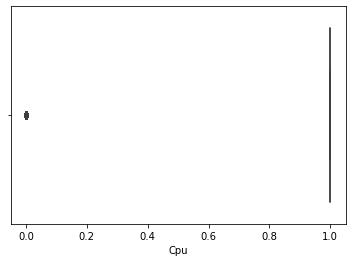

E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


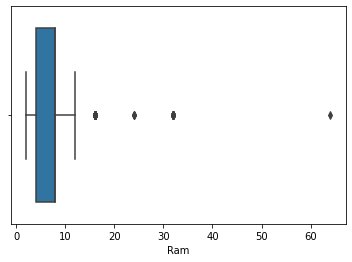

E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


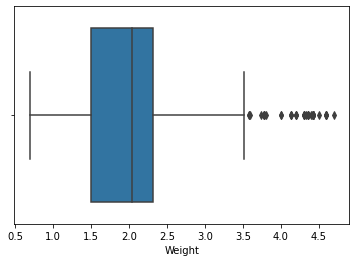

E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


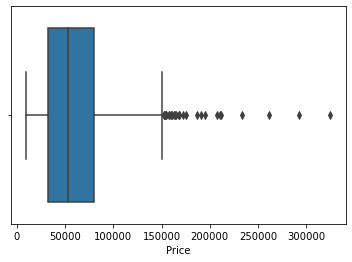

E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


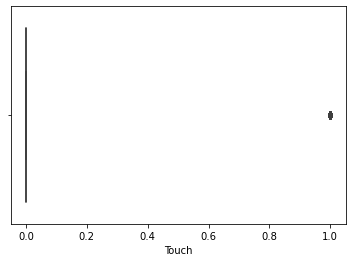

E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


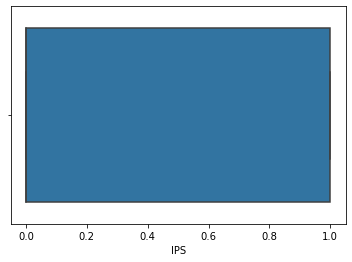

E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


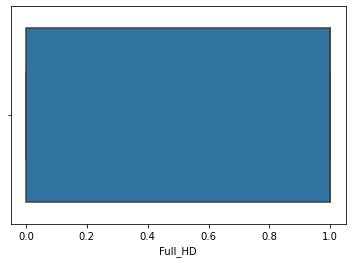

E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


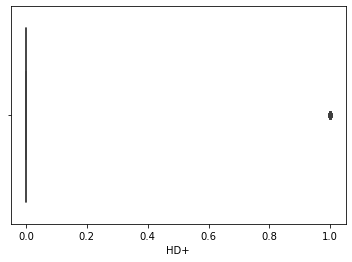

E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


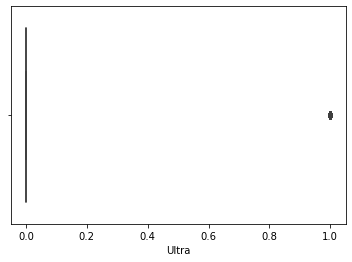

E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


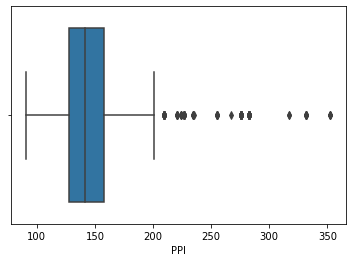

E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


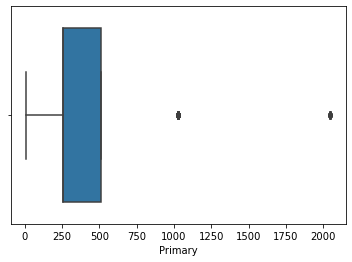

E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


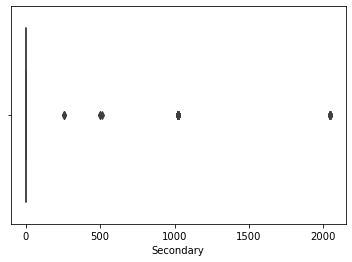

E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


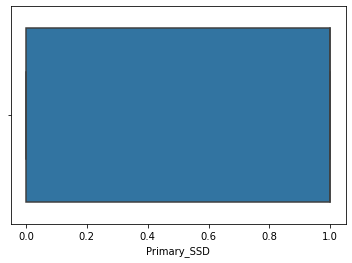

E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


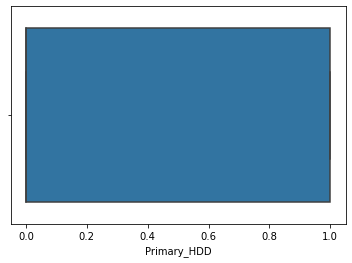

E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


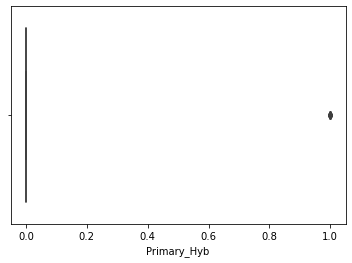

E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


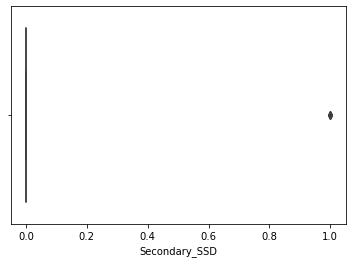

E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


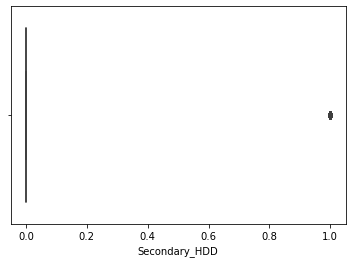

E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


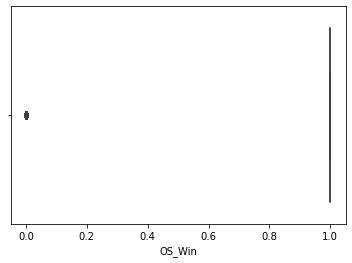

E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


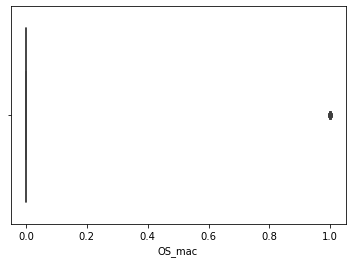

In [63]:
for i in raw_data.select_dtypes(include=np.number).columns:
    sns.boxplot(raw_data[i])
    plt.show()

The major columns to be concentrated are Ram, weight, Price, PPI, Primary, Secondary. Others are encoded.

<br> There are outliers.
<br> It is not good to remove outliers, because there are many options like using log, using different robust algorithms etc., 
<br> Outliers are not removed, lets test how different algorithm gives accuracy, if none of them is giving expected accuracy, then Outliers can be treated.

<AxesSubplot:xlabel='Company', ylabel='Price'>

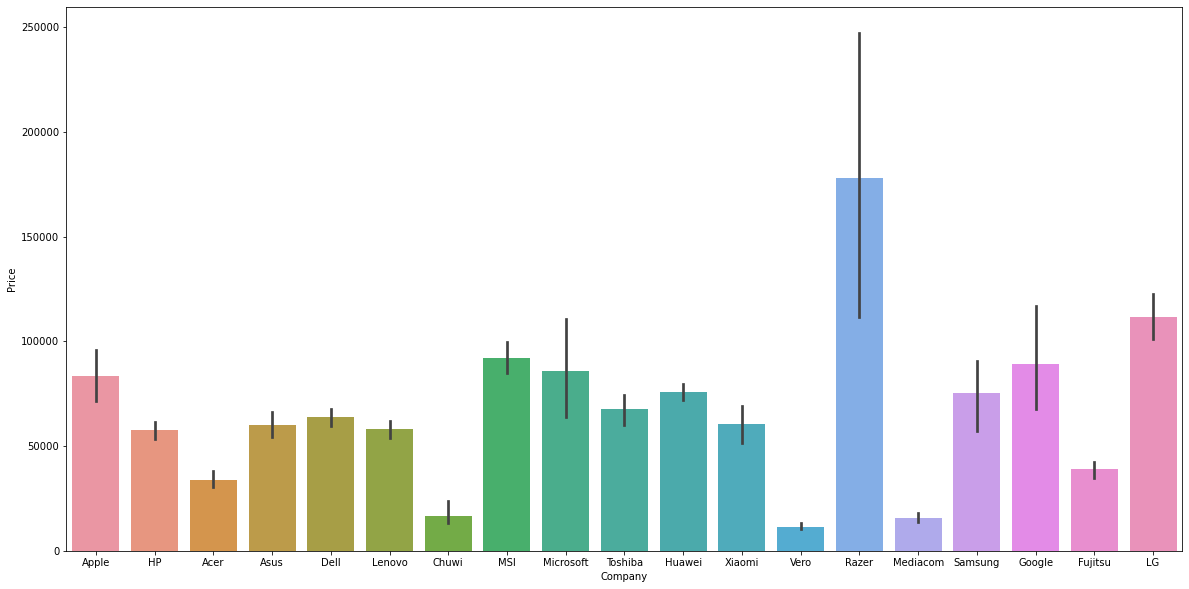

In [64]:
plt.figure(figsize=(20,10))
sns.barplot(x="Company",y="Price",data=raw_data)

<AxesSubplot:xlabel='TypeName', ylabel='Price'>

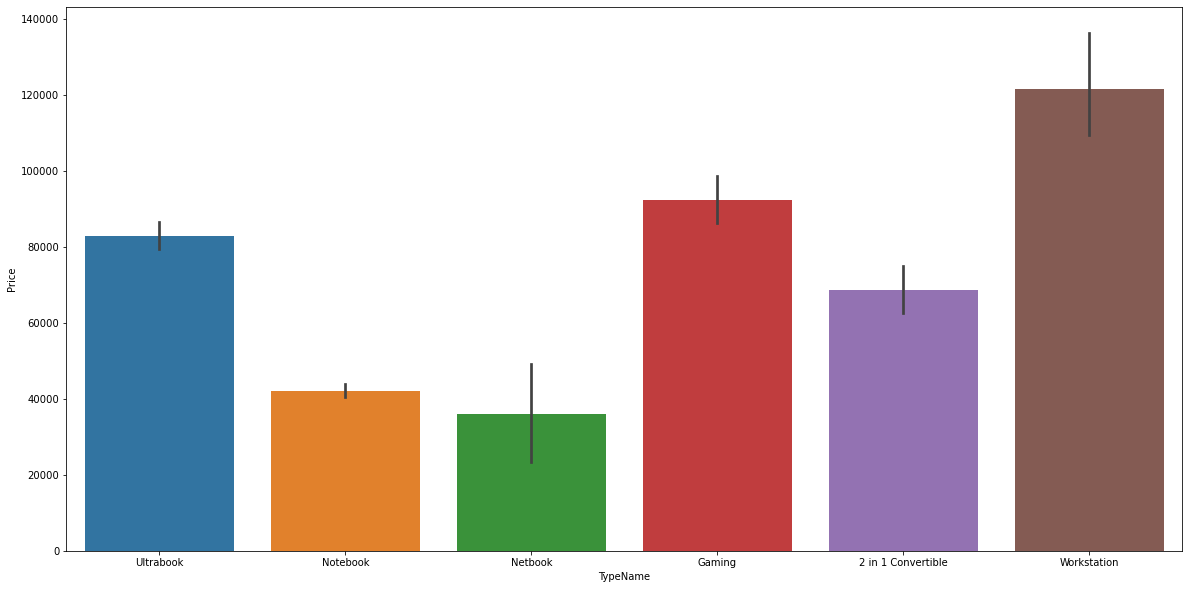

In [65]:
plt.figure(figsize=(20,10))
sns.barplot(x="TypeName",y="Price",data=raw_data)

<AxesSubplot:>

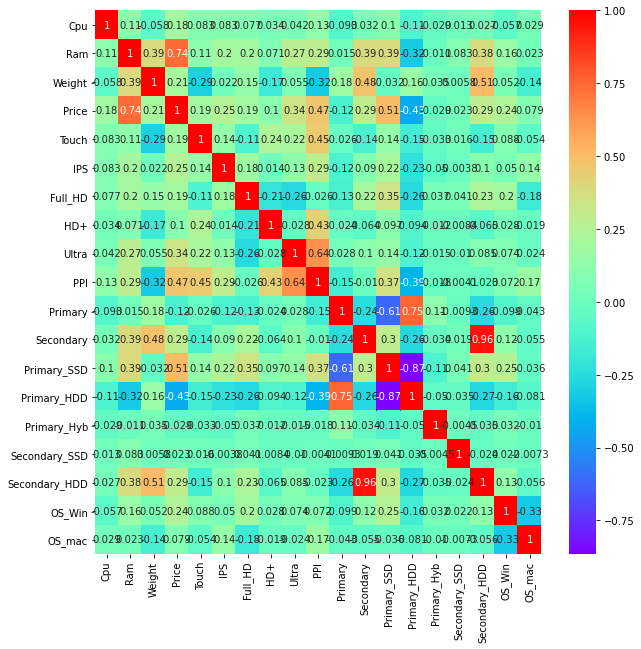

In [66]:
plt.figure(figsize=(10,10))
sns.heatmap(raw_data.corr(),cmap="rainbow",annot=True)

E:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

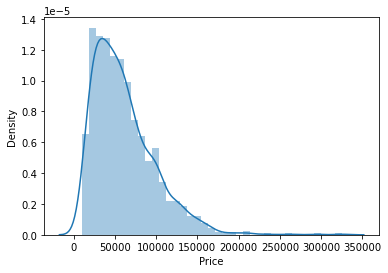

In [67]:
sns.distplot(raw_data["Price"])

E:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

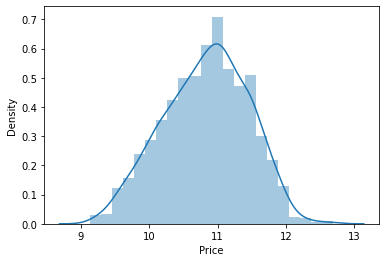

In [68]:
sns.distplot(np.log(raw_data["Price"]))

### Model Building

In [69]:
from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import tree
from sklearn import metrics



In [70]:
Test=np.log(raw_data["Price"])
Train=raw_data.drop(columns=["Price"])

In [71]:
X_Train,X_Test,Y_Train,Y_Test=train_test_split(Train,Test,test_size=0.2,random_state=1)
x_train,val_x,y_train,val_y=train_test_split(X_Train,Y_Train,test_size=0.2,random_state=1)

In [72]:
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("val_x:",val_x.shape)
print("val_y:",val_y.shape)
print("X_test:",X_Test.shape)
print("Y_Test:",Y_Test.shape)

x_train: (815, 21)
y_train: (815,)
val_x: (204, 21)
val_y: (204,)
X_test: (255, 21)
Y_Test: (255,)


We need column index to specify while performing column Transformer

In [73]:
column_index={i:j for i,j in enumerate(x_train.columns)}

In [74]:
column_index

{0: 'Company',
 1: 'TypeName',
 2: 'Cpu',
 3: 'Ram',
 4: 'Gpu',
 5: 'Weight',
 6: 'Touch',
 7: 'IPS',
 8: 'Full_HD',
 9: 'HD+',
 10: 'Ultra',
 11: 'PPI',
 12: 'Primary',
 13: 'Secondary',
 14: 'Primary_SSD',
 15: 'Primary_HDD',
 16: 'Primary_Hyb',
 17: 'Secondary_SSD',
 18: 'Secondary_HDD',
 19: 'OS_Win',
 20: 'OS_mac'}

### Linear Regression

In [79]:
# there are columns to be encoded such as company,typename,Gpu respective index are [0,1,4]

ct = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,4])
],remainder='passthrough')

model1=LinearRegression()

flow=Pipeline([("step1",ct),("step2",model1)])

flow.fit(x_train,y_train)

y_pred=flow.predict(val_x)

print("R2score:", metrics.r2_score(val_y,y_pred))
print("MSE:", metrics.mean_squared_error(val_y,y_pred))
print("MAE:",metrics.mean_absolute_error(val_y,y_pred))

R2score: 0.8130556779472092
MSE: 0.08047145736896784
MAE: 0.22604693725474384


### Ridge Regression

In [80]:
ct=ColumnTransformer(transformers=[
    ("col_trf",OneHotEncoder(sparse=False,drop='first'),[0,1,4])],
    remainder="passthrough")

model2=Ridge(alpha=10)

flow=Pipeline([("step1",ct),("step2",model2)])

flow.fit(x_train,y_train)

y_pred=flow.predict(val_x)

print("R2score:", metrics.r2_score(val_y,y_pred))
print("MSE:", metrics.mean_squared_error(val_y,y_pred))
print("MAE:",metrics.mean_absolute_error(val_y,y_pred))

R2score: 0.8019177963413892
MSE: 0.08526583440583908
MAE: 0.23245504104310521


### Lasso Regression

In [82]:
ct=ColumnTransformer(transformers=[
    ("col_trf",OneHotEncoder(sparse=False,drop='first'),[0,1,4])],
    remainder="passthrough")

model3=Lasso(alpha=0.001)

flow=Pipeline([("step1",ct),("step2",model3)])

flow.fit(x_train,y_train)

y_pred=flow.predict(val_x)

print("R2score:", metrics.r2_score(val_y,y_pred))
print("MSE:", metrics.mean_squared_error(val_y,y_pred))
print("MAE:",metrics.mean_absolute_error(val_y,y_pred))

R2score: 0.805947329116266
MSE: 0.08353129456344263
MAE: 0.22951947748060725


### DecisionTree

In [90]:
ct=ColumnTransformer(transformers=[
    ("col_trf",OneHotEncoder(sparse=False,drop='first'),[0,1,4])],
    remainder="passthrough")

model4=DecisionTreeRegressor(random_state=3,
                              max_features=0.75,
                              max_depth=15)

flow=Pipeline([("step1",ct),("step2",model4)])

flow.fit(x_train,y_train)

y_pred=flow.predict(val_x)

print("R2score:", metrics.r2_score(val_y,y_pred))
print("MSE:", metrics.mean_squared_error(val_y,y_pred))
print("MAE:",metrics.mean_absolute_error(val_y,y_pred))

R2score: 0.7877948457061228
MSE: 0.0913451547483363
MAE: 0.23030838637842163


### Random Forest

In [91]:
ct=ColumnTransformer(transformers=[
    ("col_trf",OneHotEncoder(sparse=False,drop='first'),[0,1,4])],
    remainder="passthrough")

model5=RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

flow=Pipeline([("step1",ct),("step2",model5)])

flow.fit(x_train,y_train)

y_pred=flow.predict(val_x)

print("R2score:", metrics.r2_score(val_y,y_pred))
print("MSE:", metrics.mean_squared_error(val_y,y_pred))
print("MAE:",metrics.mean_absolute_error(val_y,y_pred))

R2score: 0.8467078894480777
MSE: 0.06598563360375653
MAE: 0.19582868035470063


In [121]:
params=  {
    
    'RandomForest':{
        'model' : RandomForestRegressor(),
        'params':{
            'n_estimators':[int(x) for x in np.linspace(100,1200,10)],
            'criterion':["mse", "mae"],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':[x for x in np.linspace(0.5,1,10)],
        }
    },
    'Decision Tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'criterion':["mse", "mae"],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['auto','sqrt','log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }
    }
}

In [122]:
scores = []
for modelname,mp in params.items():
    clf = RandomizedSearchCV(mp['model'],
                            param_distributions=mp['params'],cv = 5,
                            n_iter=10,scoring='neg_mean_squared_error',verbose=2)
    ct=ColumnTransformer(transformers=[
    ("col_trf",OneHotEncoder(sparse=False,drop='first'),[0,1,4])],
    remainder="passthrough")
    
    flow=Pipeline([("step1",ct),("step2",clf)])
    
    flow.fit(x_train,y_train)
    scores.append({
        'model_name':modelname,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_,
    })

Fitting 5 folds for each of 10 candidates, totalling 50 fits


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END criterion=mae, max_depth=1, max_features=0.7777777777777778, n_estimators=711; total time=   4.3s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END criterion=mae, max_depth=1, max_features=0.7777777777777778, n_estimators=711; total time=   4.1s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END criterion=mae, max_depth=1, max_features=0.7777777777777778, n_estimators=711; total time=   4.5s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END criterion=mae, max_depth=1, max_features=0.7777777777777778, n_estimators=711; total time=   4.1s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END criterion=mae, max_depth=1, max_features=0.7777777777777778, n_estimators=711; total time=   4.8s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=1, max_features=0.6111111111111112, n_estimators=222; total time=   0.3s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=1, max_features=0.6111111111111112, n_estimators=222; total time=   0.2s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=1, max_features=0.6111111111111112, n_estimators=222; total time=   0.2s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=1, max_features=0.6111111111111112, n_estimators=222; total time=   0.2s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=1, max_features=0.6111111111111112, n_estimators=222; total time=   0.2s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=1, max_features=0.7777777777777778, n_estimators=344; total time=   0.4s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=1, max_features=0.7777777777777778, n_estimators=344; total time=   0.4s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=1, max_features=0.7777777777777778, n_estimators=344; total time=   0.4s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=1, max_features=0.7777777777777778, n_estimators=344; total time=   0.5s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=1, max_features=0.7777777777777778, n_estimators=344; total time=   0.4s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=1, max_features=0.8888888888888888, n_estimators=466; total time=   0.6s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=1, max_features=0.8888888888888888, n_estimators=466; total time=   0.9s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=1, max_features=0.8888888888888888, n_estimators=466; total time=   0.8s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=1, max_features=0.8888888888888888, n_estimators=466; total time=   0.6s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=1, max_features=0.8888888888888888, n_estimators=466; total time=   0.8s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=8, max_features=0.9444444444444444, n_estimators=466; total time=   1.6s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=8, max_features=0.9444444444444444, n_estimators=466; total time=   1.4s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=8, max_features=0.9444444444444444, n_estimators=466; total time=   1.1s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=8, max_features=0.9444444444444444, n_estimators=466; total time=   1.1s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=8, max_features=0.9444444444444444, n_estimators=466; total time=   1.1s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=30, max_features=0.5555555555555556, n_estimators=711; total time=   2.0s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=30, max_features=0.5555555555555556, n_estimators=711; total time=   2.0s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=30, max_features=0.5555555555555556, n_estimators=711; total time=   2.0s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=30, max_features=0.5555555555555556, n_estimators=711; total time=   2.3s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=30, max_features=0.5555555555555556, n_estimators=711; total time=   2.0s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END criterion=mae, max_depth=15, max_features=0.6666666666666666, n_estimators=1077; total time=  21.9s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END criterion=mae, max_depth=15, max_features=0.6666666666666666, n_estimators=1077; total time=  30.7s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END criterion=mae, max_depth=15, max_features=0.6666666666666666, n_estimators=1077; total time=  28.5s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END criterion=mae, max_depth=15, max_features=0.6666666666666666, n_estimators=1077; total time=  24.8s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END criterion=mae, max_depth=15, max_features=0.6666666666666666, n_estimators=1077; total time=  25.2s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END criterion=mae, max_depth=1, max_features=1.0, n_estimators=711; total time=   5.7s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END criterion=mae, max_depth=1, max_features=1.0, n_estimators=711; total time=   5.7s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END criterion=mae, max_depth=1, max_features=1.0, n_estimators=711; total time=   6.1s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END criterion=mae, max_depth=1, max_features=1.0, n_estimators=711; total time=   6.3s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END criterion=mae, max_depth=1, max_features=1.0, n_estimators=711; total time=   6.5s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END criterion=mae, max_depth=15, max_features=1.0, n_estimators=466; total time=  14.8s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END criterion=mae, max_depth=15, max_features=1.0, n_estimators=466; total time=  13.9s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END criterion=mae, max_depth=15, max_features=1.0, n_estimators=466; total time=  15.5s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END criterion=mae, max_depth=15, max_features=1.0, n_estimators=466; total time=  14.6s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END criterion=mae, max_depth=15, max_features=1.0, n_estimators=466; total time=  15.0s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=8, max_features=0.5555555555555556, n_estimators=588; total time=   2.4s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=8, max_features=0.5555555555555556, n_estimators=588; total time=   2.4s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=8, max_features=0.5555555555555556, n_estimators=588; total time=   2.0s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=8, max_features=0.5555555555555556, n_estimators=588; total time=   2.3s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=8, max_features=0.5555555555555556, n_estimators=588; total time=   2.2s


E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=22, max_features=auto, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=22, max_features=auto, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=22, max_features=auto, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=22, max_features=auto, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=22, max_features=auto, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mae, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mae, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=14; total time=   0.0s
[

E:\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
E:\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
E:\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
E:\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
E:\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features=

[CV] END ccp_alpha=0.01, criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=14, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=22, max_features=auto, min_samples_leaf=14, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=22, max_features=auto, min_samples_leaf=14, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=22, max_features=auto, min_samples_leaf=14, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=22, max_features=auto, min_samples_leaf=14, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=22, max_features=auto, min_samples_leaf=14, min_samples_split=10; total time=   0.0s


E:\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
E:\anaconda3\lib\site-packages\sklearn\tree\_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
E:\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
E:\anaconda3\lib\site-packages\sklearn\tree\_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
E:\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_feature

[CV] END ccp_alpha=0.01, criterion=mae, max_depth=22, max_features=auto, min_samples_leaf=14, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mae, max_depth=22, max_features=auto, min_samples_leaf=14, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mae, max_depth=22, max_features=auto, min_samples_leaf=14, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mae, max_depth=22, max_features=auto, min_samples_leaf=14, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mae, max_depth=22, max_features=auto, min_samples_leaf=14, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=mae, max_depth

E:\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
E:\anaconda3\lib\site-packages\sklearn\tree\_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
E:\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
E:\anaconda3\lib\site-packages\sklearn\tree\_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
E:\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_feature

[CV] END ccp_alpha=0.0025, criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=14, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=mae, m

E:\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
E:\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
E:\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
E:\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
E:\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 a

[CV] END ccp_alpha=0.01, criterion=mae, max_depth=22, max_features=auto, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mae, max_depth=22, max_features=auto, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mae, max_depth=22, max_features=auto, min_samples_leaf=5, min_samples_split=10; total time=   0.0s


E:\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
E:\anaconda3\lib\site-packages\sklearn\tree\_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
E:\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
E:\anaconda3\lib\site-packages\sklearn\tree\_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
E:\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_feature

In [123]:
scores

[{'model_name': 'RandomForest',
  'best_score': -0.061955988667591756,
  'best_estimator': RandomForestRegressor(criterion='mae', max_depth=15, n_estimators=466)},
 {'model_name': 'Decision Tree',
  'best_score': -0.11397599835628817,
  'best_estimator': DecisionTreeRegressor(ccp_alpha=0.005, criterion='mae', max_depth=22,
                        max_features='auto', min_samples_leaf=14,
                        min_samples_split=10)}]

In [105]:
ct=ColumnTransformer(transformers=[
    ("col_trf",OneHotEncoder(sparse=False,drop='first'),[0,1,4])],
    remainder="passthrough")

model6=RandomForestRegressor(criterion='mse', max_depth=1, max_features=1,
                        n_estimators=222)

flow=Pipeline([("step1",ct),("step2",model6)])

flow.fit(x_train,y_train)

y_pred=flow.predict(val_x)

print("R2score:", metrics.r2_score(val_y,y_pred))
print("MSE:", metrics.mean_squared_error(val_y,y_pred))
print("MAE:",metrics.mean_absolute_error(val_y,y_pred))

E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


R2score: 0.8611954633534467
MSE: 0.059749358689900424
MAE: 0.18835185215624115


In [124]:
ct=ColumnTransformer(transformers=[
    ("col_trf",OneHotEncoder(sparse=False,drop='first'),[0,1,4])],
    remainder="passthrough")

model7=RandomForestRegressor(criterion='mae', max_depth=15,
                        n_estimators=466)

flow=Pipeline([("step1",ct),("step2",model7)])

flow.fit(x_train,y_train)

y_pred=flow.predict(val_x)

print("R2score:", metrics.r2_score(val_y,y_pred))
print("MSE:", metrics.mean_squared_error(val_y,y_pred))
print("MAE:",metrics.mean_absolute_error(val_y,y_pred))

E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


R2score: 0.8506943565627539
MSE: 0.06426963166826655
MAE: 0.19142363917185234
